In [1]:
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [6]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [8]:
param_grid = {'n_components': [5, 10], 'max_iter': [1000, 5000]}
grid = GridSearchCV(PLSRegression(), param_grid, refit=True, verbose=2)
grid.fit(x_train.to_numpy(), y_train.to_numpy().ravel())
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test.to_numpy())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................max_iter=1000, n_components=5; total time=   0.6s
[CV] END ......................max_iter=1000, n_components=5; total time=   0.5s
[CV] END ......................max_iter=1000, n_components=5; total time=   0.5s
[CV] END ......................max_iter=1000, n_components=5; total time=   0.5s
[CV] END ......................max_iter=1000, n_components=5; total time=   0.5s
[CV] END .....................max_iter=1000, n_components=10; total time=   0.9s
[CV] END .....................max_iter=1000, n_components=10; total time=   0.9s
[CV] END .....................max_iter=1000, n_components=10; total time=   0.9s
[CV] END .....................max_iter=1000, n_components=10; total time=   0.9s
[CV] END .....................max_iter=1000, n_components=10; total time=   0.9s
[CV] END ......................max_iter=5000, n_components=5; total time=   0.5s
[CV] END ......................max_iter=5000, n_c

In [9]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [10]:
y_pred = grid.predict(submission_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


array([[20.64917721],
       [20.65990688],
       [20.67063655],
       ...,
       [18.87237683],
       [18.89383617],
       [18.90456584]])

In [11]:
weekly_sales = np.round(y_pred[:,0]**3, 2)
weekly_sales

array([8804.57, 8818.3 , 8832.05, ..., 6721.71, 6744.67, 6756.16])

In [12]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
PLS_submission = pd.DataFrame(data=sub)
PLS_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,8804.57
1,1_1_2012-11-09,8818.30
2,1_1_2012-11-16,8832.05
3,1_1_2012-11-23,8845.81
4,1_1_2012-11-30,8859.59
...,...,...
115059,45_98_2013-06-28,6698.81
115060,45_98_2013-07-05,6710.25
115061,45_98_2013-07-12,6721.71
115062,45_98_2013-07-19,6744.67


In [13]:
PLS = PLSRegression(max_iter=1000, n_components=10).fit(x_train,y_train)
train_score = PLS.score(x_train, y_train)
test_score = PLS.score(x_test, y_test)
test_score

0.09462053286795713

In [14]:
y_pred = PLS.predict(x_test)

In [15]:
from sklearn.model_selection import learning_curve

train_size = [1, 25, 50, 100, 500, 2500, 7500, 15000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = PLS,
X = x_train,
y = y_train, train_sizes = train_size, cv = 5,
scoring = 'neg_mean_absolute_error')

In [16]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[        nan         nan         nan         nan         nan]
 [-3.32970979 -4.59552921 -4.59552921 -4.59552921 -4.59552921]
 [-5.77395935 -6.56556284 -6.56556284 -6.56556284 -6.56556284]
 [-6.8887448  -7.04820043 -7.04820043 -7.04820043 -7.04820043]
 [-7.44654957 -7.38581767 -7.38581767 -7.38581767 -7.38581767]
 [-7.79055286 -7.81552082 -7.81552082 -7.81552082 -7.81552082]
 [-7.82728987 -7.80676973 -7.80676973 -7.80676973 -7.80676973]
 [-7.75823398 -7.75054752 -7.75054752 -7.75054752 -7.75054752]]

 ----------------------------------------------------------------------

Validation scores:

 [[         nan          nan          nan          nan          nan]
 [-18.28606984 -21.81985652 -22.0529974  -22.13026551 -21.27414836]
 [-11.66805011 -11.54506346 -11.71356553 -11.81364052 -11.3886873 ]
 [ -9.16527329 -10.31998858 -10.42770773 -10.50553826 -10.22178027]
 [ -7.93676753  -7.90572266  -7.9031733   -7.88283969  -7.92434674]
 [ -7.79218135  -7.77807071  -7.76995235 

In [17]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1             NaN
25      -4.342365
50      -6.407242
100     -7.016309
500     -7.397964
2500    -7.810527
7500    -7.810874
15000   -7.752085
dtype: float64

 --------------------

Mean validation scores

 1              NaN
25      -21.112668
50      -11.625801
100     -10.128058
500      -7.910570
2500     -7.783050
7500     -7.774358
15000    -7.770968
dtype: float64


In [18]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1             NaN
25       4.342365
50       6.407242
100      7.016309
500      7.397964
2500     7.810527
7500     7.810874
15000    7.752085
dtype: float64

 --------------------

Mean validation scores

 1              NaN
25       21.112668
50       11.625801
100      10.128058
500       7.910570
2500      7.783050
7500      7.774358
15000     7.770968
dtype: float64


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('Mean Abs Error:', mean_absolute_error(y_test, y_pred))

Mean squared error: 89.37
Coefficient of determination: 0.09
Mean Abs Error: 7.760920758733812


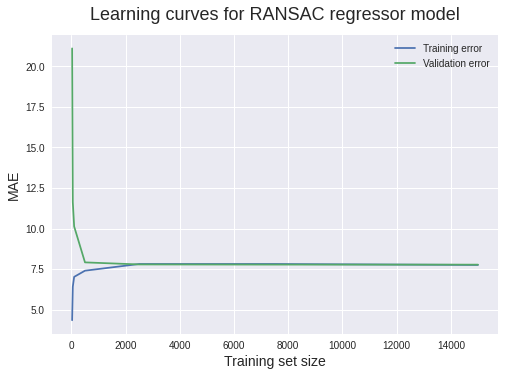

In [20]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RANSAC regressor model', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
from google.colab import drive
drive.mount('drive')
PLS_submission.to_csv('PLS_submission.csv')
!cp PLS_submission.csv "drive/My Drive/"